<a href="https://colab.research.google.com/github/Ali-Motlagh/MiniProjects/blob/main/Data%20Science%20Job%20Data%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Scientist** 
### **Where** are they?
## and what are they **worth?**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# upload Data Science Jobs Salaries.csv
from google.colab import files
files.upload()

Saving Data Science Jobs Salaries.csv to Data Science Jobs Salaries.csv


{'Data Science Jobs Salaries.csv': b'work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size\n2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L\n2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L\n2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M\n2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L\n2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S\n2021e,SE,FT,Data Analytics Manager,120000,USD,120000,US,100,US,M\n2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M\n2020,MI,FT,Data Analyst,41000,EUR,46759,FR,50,FR,L\n2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L\n2021e,SE,FT,Data Science Engineer,159500,CAD,127543,CA,50,CA,L\n2021e,SE,FT,Manager Data Science,144000,USD,144000,US,100,US,L\n2021e,EN,FT,Data Scientist,13400,USD,13400,UA,100,UA,L\n2021e,MI,FT,Data Scientist,95000,CAD,75966,CA,100,CA,L\n2021e,MI,FT,Data Scientist,150000,USD

In [ ]:
df = pd.read_csv("Data Science Jobs Salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:

df['work_year'] = df['work_year'].str.replace(r'[\D\s]', '').astype(int)
df1 = df.drop(['salary','salary_currency'], axis = 1)

## EDA

In [ ]:

df1

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Data Science Consultant,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,68428,GR,100,US,L
2,2021,EX,FT,Head of Data Science,85000,RU,0,RU,M
3,2021,EX,FT,Head of Data,230000,RU,50,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,US,100,US,L
241,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [ ]:
df1.describe()

,work_year,salary_in_usd,remote_ratio
count,245.000000,245.000000,245.000000
mean,2020.730612,99868.012245,69.183673
std,0.444550,83983.326949,37.593421
min,2020.000000,2876.000000,0.000000
25%,2020.000000,45896.000000,50.000000
50%,2021.000000,81000.000000,100.000000
75%,2021.000000,130000.000000,100.000000
max,2021.000000,600000.000000,100.000000


## Visualizations

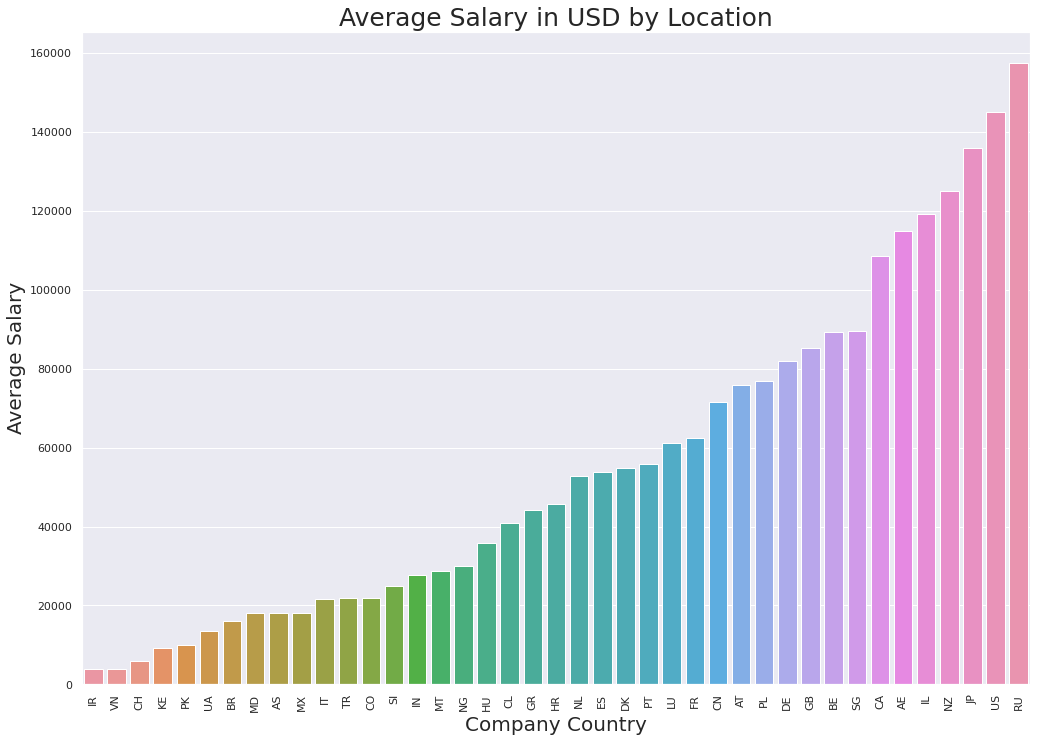

In [ ]:
import seaborn as sns

# Let's take a look at the jobs and their salaries in usd
sns.set()
job_salary_usd = df[['company_location', 'salary_in_usd']]
job_salary_usd = job_salary_usd.groupby('company_location').mean()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(17,12))
g = sns.barplot(x='company_location',
                y='salary_in_usd',
                data=job_salary_usd,
                ci=None)
#g.bar_label(g.containers[0], rotation=90)
plt.ylabel("Average Salary", size=20)
plt.xlabel('Company Country', size=20)
plt.xticks(rotation=90)
plt.title("Average Salary in USD by Location", size=25);

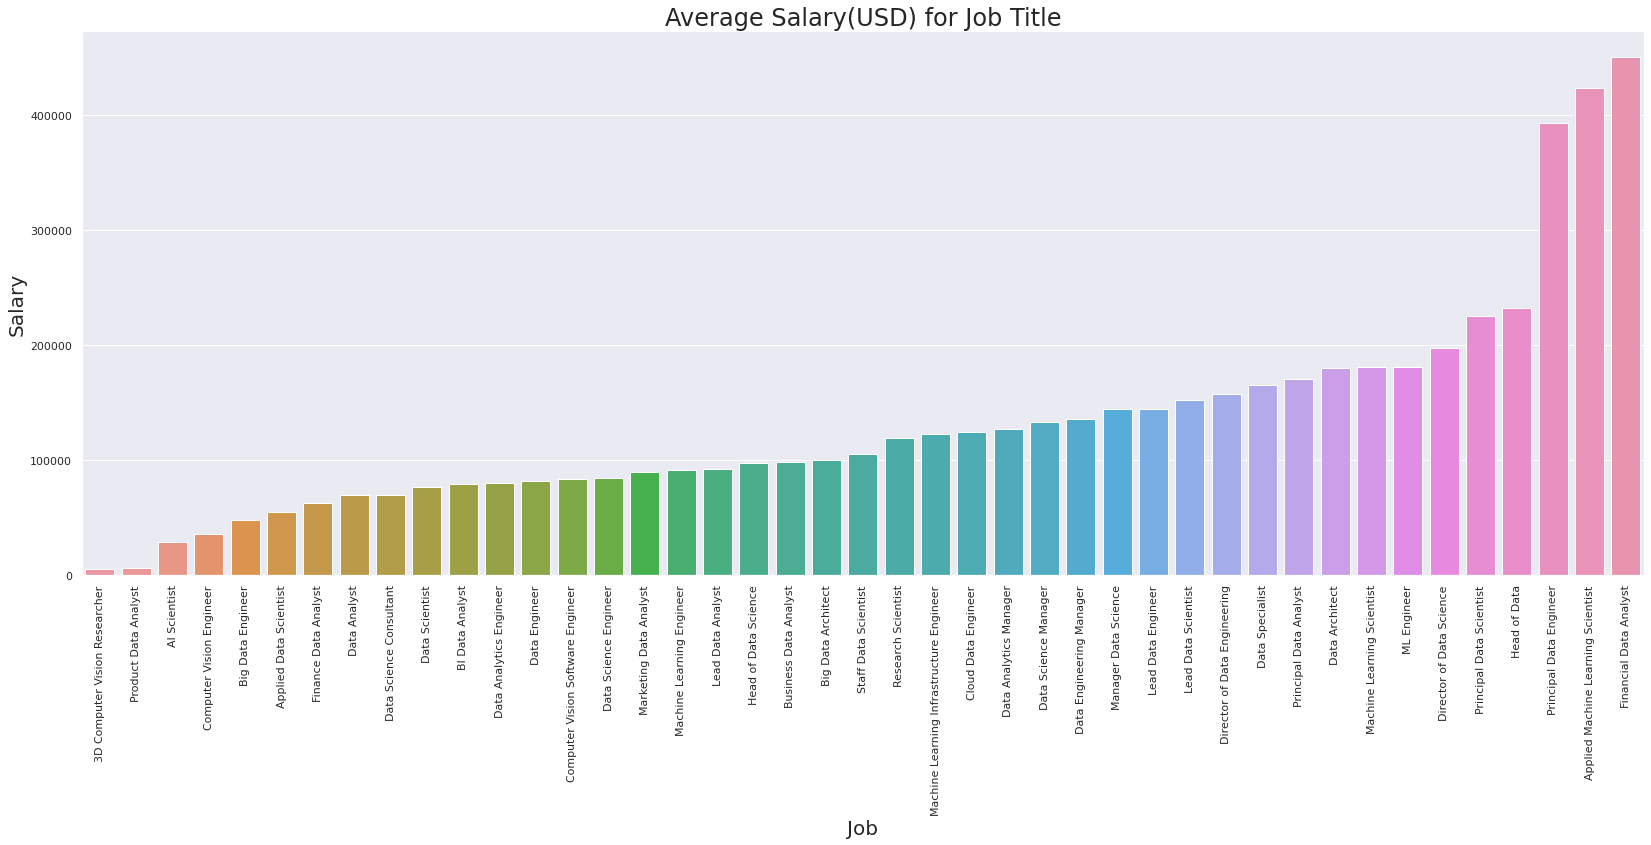

In [ ]:
sns.set()
job_salary_usd = df[['job_title', 'salary_in_usd']]
job_salary_usd = job_salary_usd.groupby('job_title').mean()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(28,10))
g = sns.barplot(x='job_title',
                y='salary_in_usd',
                data=job_salary_usd,
                ci=None)

plt.ylabel("Salary", size=20)
plt.xlabel('Job', size=20)
plt.xticks(rotation=90)
plt.title("Average Salary(USD) for Job Title", size=24);

## Company Size Count

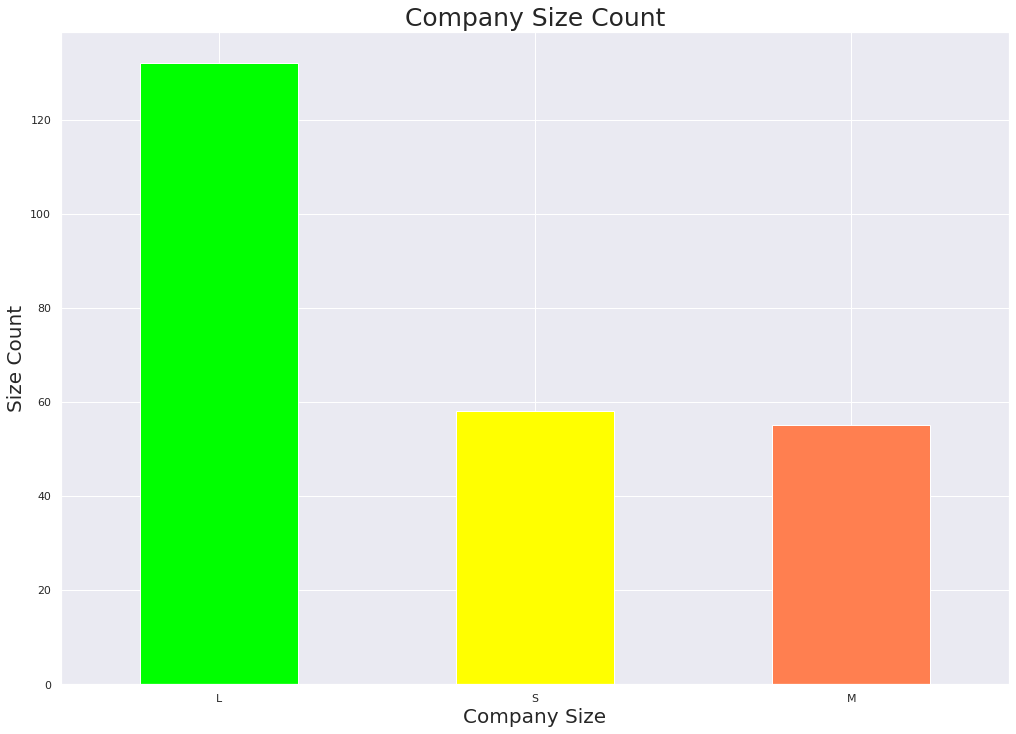

In [ ]:
com_size = df.groupby('company_size').size().sort_values(ascending=False)
fig = plt.figure(figsize=(17,12))
g = com_size.plot(kind='bar', color=['lime', 'yellow', 'coral'])
#g.bar_label(g.containers[0])
plt.title("Company Size Count", size=25)
plt.xlabel('Company Size', size=20)
plt.ylabel('Size Count', size=20)
plt.xticks(rotation=0)
plt.show()

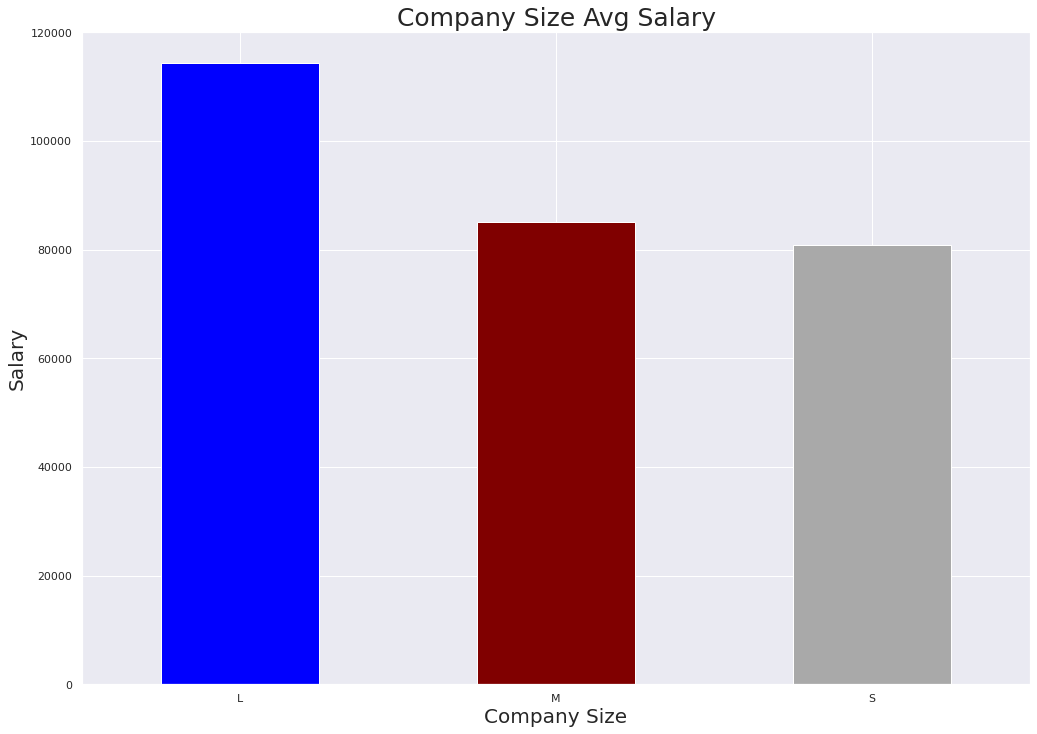

In [ ]:
size_pay = df.groupby('company_size').mean()['salary_in_usd'].sort_values(ascending=False)
fig = plt.figure(figsize=(17,12))
g = size_pay.plot(kind='bar', color=['blue', 'maroon', 'darkgrey'])
#g.bar_label(g.containers[0])
plt.title("Company Size Avg Salary", size=25)
plt.xlabel('Company Size', size=20)
plt.ylabel('Salary', size=20)
plt.xticks(rotation=0)
plt.show()

Company Count per Country

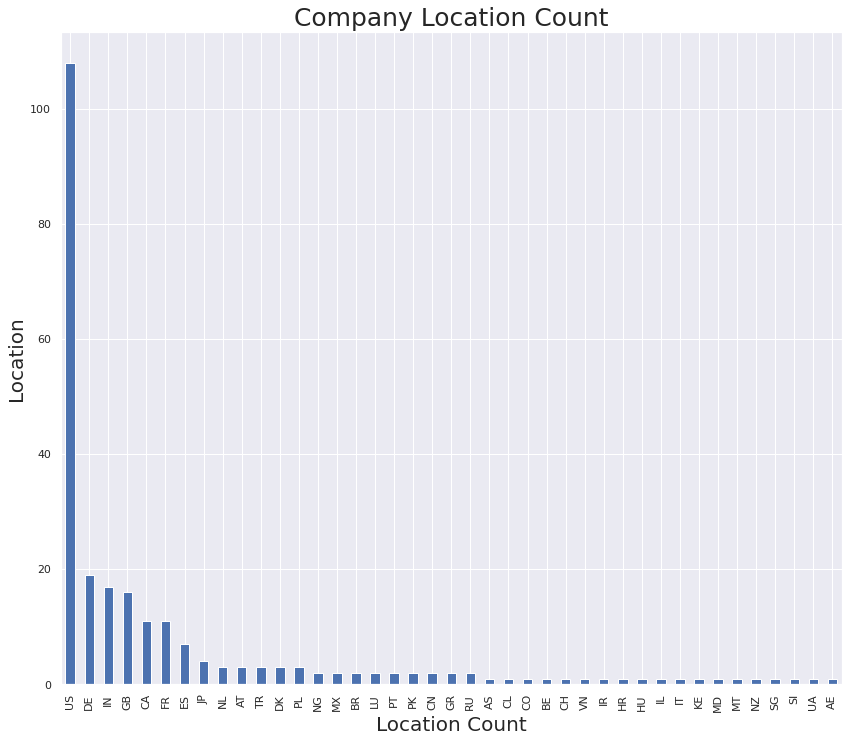

In [ ]:
com_loc = df.groupby('company_location').size().sort_values(ascending=False)
#plotting the data
fig = plt.figure(figsize=(14,12))
g = com_loc.plot(kind='bar')
#g.bar_label(g.containers[0],rotation=45)
plt.xlabel("Location Count", size=20)
plt.ylabel('Location', size=20)
plt.title("Company Location Count", size=25)
plt.show()

## TOP JOBS

In [ ]:
job_fda = df1[df1['job_title'] == 'Financial Data Analyst']
job_fda.groupby('company_location').size().sort_values(ascending=False).reset_index()

,company_location,0
0,US,1


In [ ]:

job_amls = df1[df1['job_title'] == "Applied Machine Learning Scientist"]
job_amls.groupby('company_location').size().sort_values(ascending=False).reset_index()


,company_location,0
0,US,1


In [ ]:
job_pde = df1[df1['job_title'] == "Principal Data Engineer"]
job_pde.groupby('company_location').size().sort_values(ascending=False).reset_index()


,company_location,0
0,US,2


## US Companies ONLY 

In [ ]:
files.upload()


Saving US Data Science Jobs Salaries.csv to US Data Science Jobs Salaries (1).csv


In [ ]:
george = pd.read_csv('US Data Science Jobs Salaries.csv')
george.describe()


#usdf = pd.DataFrame()

In [ ]:
, columns=['experience_level', 'employment_type', 'job_title']

In [ ]:

george['work_year'] = george['work_year'].str.replace(r'[\D\s]', '').astype(int)



In [ ]:
g1 = pd.get_dummies(data=george)

In [ ]:
x = g1.drop(['salary_in_usd'], axis = 1)
y = g1['salary_in_usd']


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, y_train, x_valid, y_valid = train_test_split(x, y, random_state = 0)


In [ ]:
linreg = LinearRegression(normalize= True).fit(x_train, y_train)

## Machine Learning: predicting salary

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import preprocessing

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df1

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Data Science Consultant,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,68428,GR,100,US,L
2,2021,EX,FT,Head of Data Science,85000,RU,0,RU,M
3,2021,EX,FT,Head of Data,230000,RU,50,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,US,100,US,L
241,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#
le.fit(df1.experience_level.drop_duplicates())
df1.experience_level = le.transform(df1.experience_level)

#
le.fit(df1.employment_type.drop_duplicates())
df1.employment_type = le.transform(df1.employment_type)

#
le.fit(df1.job_title.drop_duplicates())
df1.job_title = le.transform(df1.job_title)

#
le.fit(df1.employee_residence.drop_duplicates())
df1.employee_residence = le.transform(df1.employee_residence)

#
le.fit(df1.company_location.drop_duplicates())
df1.company_location = le.transform(df1.company_location)

#
le.fit(df1.company_size.drop_duplicates())
df1.company_size = le.transform(df1.company_size)

df1.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,0,2,17,64369,9,50,10,0
1,2020,3,2,20,68428,14,100,39,0
2,2021,1,2,27,85000,38,0,34,1
3,2021,1,2,26,230000,38,50,34,0
4,2021,0,2,32,125000,43,100,39,2


In [ ]:
drops = [] # 'work_year','employment_type','company_size', 'remote_ratio', 'company_location', 'experience_level'
df2 = df1.drop(drops, axis = 1)

x = df2.drop(['salary_in_usd'], axis=1)
y = df2['salary_in_usd']



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train,y_train)
ypred = lr.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
mr = RandomForestRegressor().fit(x_train, y_train)
ypredmr = mr.predict(x_test)
mr.score(x_train, y_train)

0.9018864392915411

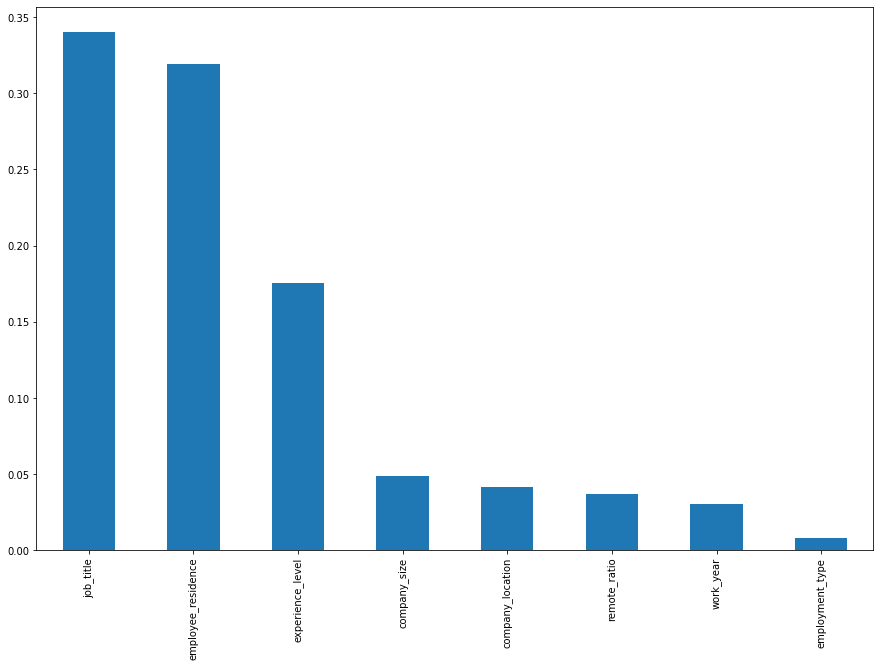

In [ ]:
plt.figure(figsize=(15,10))
ftimp = pd.Series(mr.feature_importances_, index=x.columns)
ftimp.nlargest(11).plot(kind='bar')

## ML: predict job title

In [ ]:
drops = []
df2 = df1.drop(drops, axis = 1)

x = df2.drop(['job_title'], axis=1)
y = df2['job_title']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
mr = RandomForestClassifier().fit(x_train, y_train)
ypredmr = mr.predict(x_test)
mr.score(x_train, y_train)

0.9693877551020408

In [ ]:
mr.score(x_test, y_test)

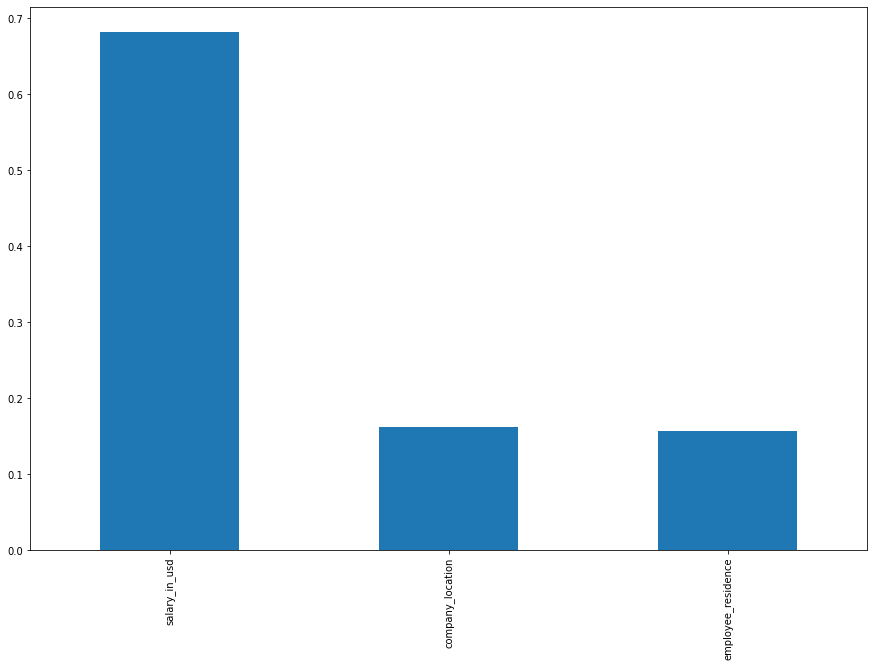

In [ ]:
plt.figure(figsize=(15,10))
ftimp = pd.Series(mr.feature_importances_, index=x.columns)
ftimp.nlargest(11).plot(kind='bar')